## 验证数据生成
运行data_meta_comb/gen_data.ipynb生成虚拟验证数据

## 训练


In [1]:
!lr=0.003 epochs=10  python ../train_eval_covar.py A B C D E

<class '__main__.TrainerDR'>
running_uuid 20230819_082752
<TrainerConfig: {"debug": false, "load_pretrain": null, "batch_size": 32, "epochs": 10, "image_size": 512, "lr": 0.003, "device": "cuda:0", "num_workers": 4, "model": "convnext_tiny"}>
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.003
    lr: 0.003
    maximize: False
    weight_decay: 1e-05
)
epoch train mat  0 loss: 0.24782922651344147 type: train matrix epoch: 0 
Test epoch 0 loss: 0.16557646525305764 type: test matrix epoch: 0 
epoch train mat  1 loss: 0.15149227971934878 type: train matrix epoch: 1 
Test epoch 1 loss: 0.1743930437635112 type: test matrix epoch: 1 
epoch train mat  2 loss: 0.1333389080950744 type: train matrix epoch: 2 
Test epoch 2 loss: 0.13859584466364208 type: test matrix epoch: 2 
epoch train mat  3 loss: 0.1254409608725702 type: train matrix epoch: 3 
Test epoch 3 loss: 0.1181222883880092 type: test matrix epoch: 3 
epoch train mat  4 loss: 0.11504

## 测试结果是否符合预期
由于检测的窗口为10年，因此，gt>10时， 算法对输入没有区分度

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pickle.load(open('./logs/TrainerDR_last/preds_9.pkl', 'rb'))

In [4]:
data

{'loss': tensor([0.0600, 0.0732, 0.1361, 0.0567, 0.1072, 0.0671, 0.0579, 0.0591, 0.0889,
         0.1563, 0.0985, 0.1563, 0.0985, 0.1104, 0.1274, 0.1362, 0.2347, 0.1017,
         0.2136, 0.0439, 0.1369, 0.1668, 0.0507, 0.0358, 0.0900, 0.1273, 0.0404,
         0.0645, 0.1496, 0.0827, 0.1583, 0.0433, 0.1049, 0.0893, 0.1304, 0.1677,
         0.3427, 0.1084, 0.0386, 0.1159, 0.0326, 0.0378, 0.2298, 0.1275, 0.1240,
         0.0940, 0.0509, 0.0350, 0.0379, 0.0909, 0.1038, 0.1625, 0.0794, 0.0967,
         0.1483, 0.0963, 0.0482, 0.1223, 0.1187, 0.0830, 0.1588, 0.0812, 0.0313,
         0.0396, 0.1080, 0.0971, 0.1196, 0.1233, 0.4637, 0.1065, 0.0475, 0.0265,
         0.1154, 0.1794, 0.0673, 0.1551, 0.1212, 0.1152, 0.1604, 0.1168, 0.0865,
         0.0743, 0.0172, 0.1324, 0.0848, 0.1892, 0.0527, 0.2193, 0.0789, 0.1094,
         0.0410, 0.1216, 0.0981, 0.1083, 0.1061, 0.1278, 0.1408, 0.0342, 0.0821,
         0.0354, 0.0529, 0.0784, 0.0948, 0.1213, 0.0941, 0.0400, 0.0554, 0.0668,
         0.0781, 0.1

0.14029445


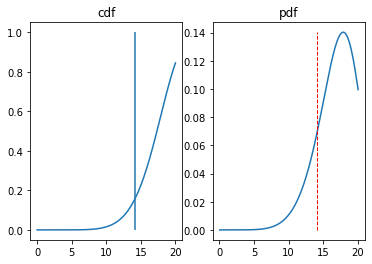

0.14029448


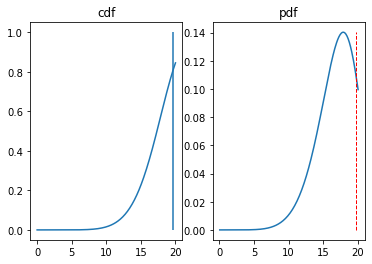

1.010358


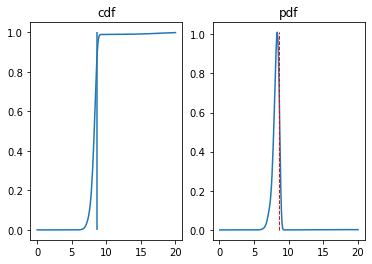

1.1572537


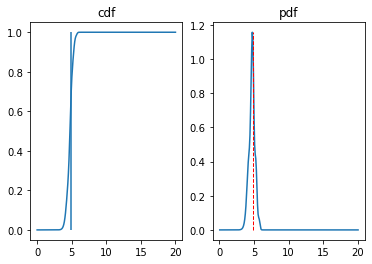

0.14016461


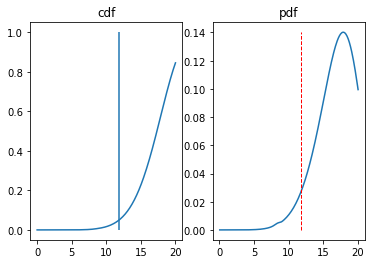

1.2878237


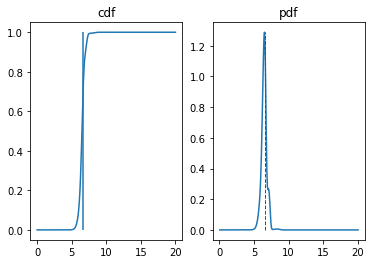

0.1644981


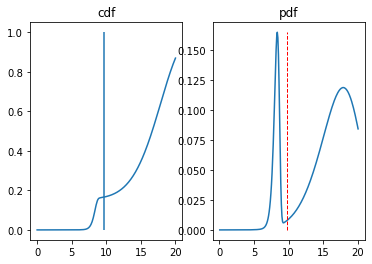

1.2719115


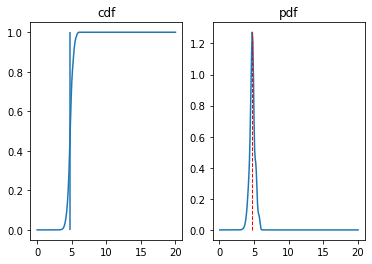

1.4819006


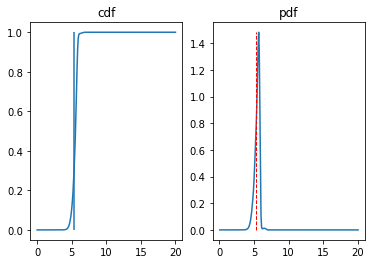

0.7557157


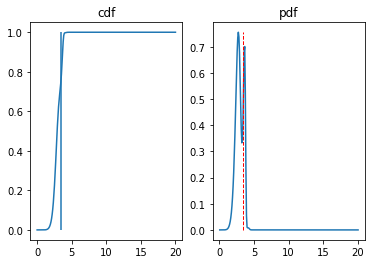

0.13612764


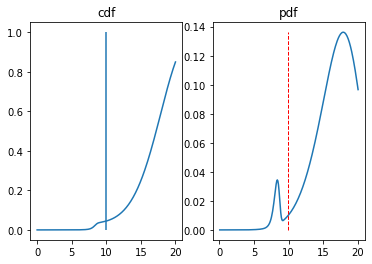

1.3065237


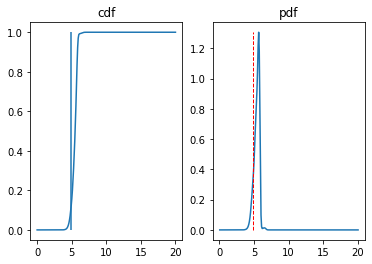

0.14029448


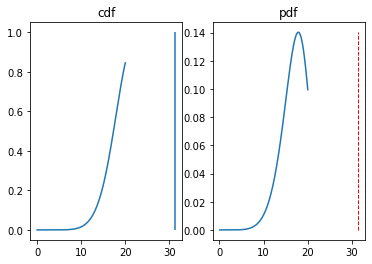

1.1173841


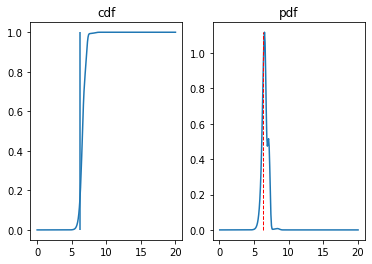

0.8481667


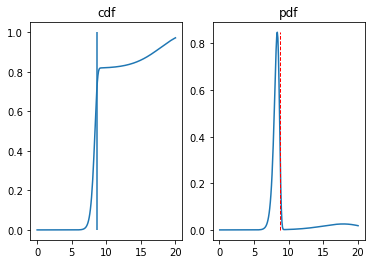

1.2729602


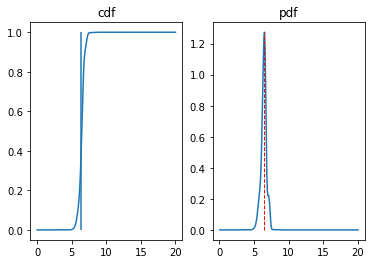

1.0907313


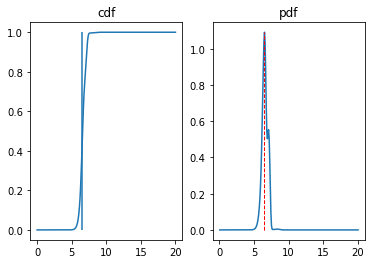

1.7245082


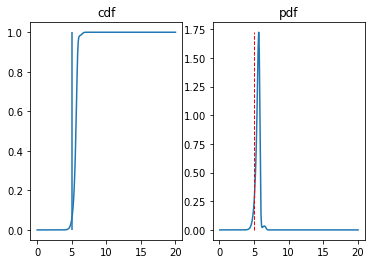

0.13869086


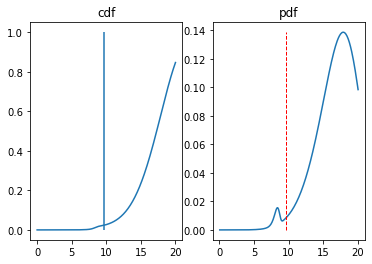

0.14029448


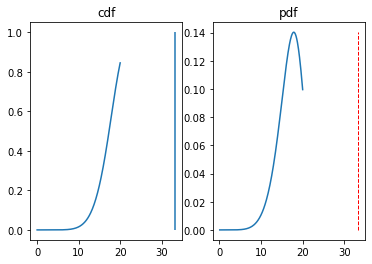

In [5]:
for i in range(20):
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, 20, 240), data['cdf'][i])
    plt.vlines(data['gt'][i],0,1)
    plt.title('cdf')
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, 20, 240),data['pdf'][i])
    maxval = np.max(data['pdf'][i].numpy()[1:])
    print(maxval)
    plt.vlines(data['gt'][i],0,maxval, color='r', linestyle='--', linewidth=1)
    plt.title('pdf')
    plt.show()